In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("../assets/csv-files/suscription.csv")
dataset.head(3)

,Age,Salary,Purchase
0,22,33915,0
1,24,39183,0
2,32,54504,1


In [3]:
# Check for null values
dataset.isnull().sum() # No null values

Age         0
Salary      0
Purchase    0
dtype: int64

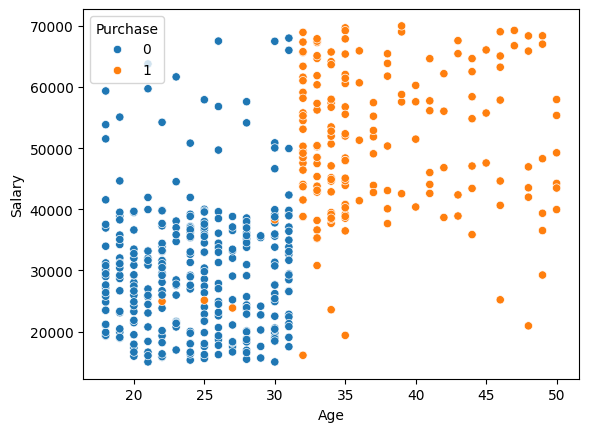

In [4]:
# Visualize the data
sns.scatterplot(x="Age", y="Salary", data=dataset, hue="Purchase")
plt.show()

In [5]:
# Seperate dependent and independent variables
x = dataset.iloc[:, :-1]
y = dataset["Purchase"]

In [6]:
# Data scaling
from sklearn.preprocessing import StandardScaler

In [7]:
ssc = StandardScaler()
ssc.fit(x)
x = pd.DataFrame(ssc.transform(x), columns=x.columns)

In [8]:
# Train test split
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [10]:
# Train model from dataset
from sklearn.neighbors import KNeighborsClassifier

In [11]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [12]:
knn.score(x_test, y_test)

0.96

In [13]:
# Check if the model is overfitted
knn.score(x_train, y_train), knn.score(x_test, y_test)

(0.98, 0.96)

In [14]:
# Find the best value of n_neighbours
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    print(i, knn.score(x_train, y_train), knn.score(x_test, y_test))

1 1.0 0.97
2 0.98 0.98
3 0.98 0.97
4 0.9775 0.96
5 0.98 0.96
6 0.975 0.96
7 0.975 0.96
8 0.9775 0.96
9 0.9675 0.96
10 0.9675 0.96
11 0.965 0.96
12 0.965 0.96
13 0.9675 0.96
14 0.9675 0.96
15 0.9625 0.96
16 0.965 0.96
17 0.9625 0.95
18 0.965 0.95
19 0.965 0.95
20 0.965 0.95
21 0.9625 0.95
22 0.9625 0.95
23 0.9625 0.95
24 0.9625 0.95
25 0.9625 0.95
26 0.9625 0.95
27 0.96 0.94
28 0.9625 0.94
29 0.96 0.94


In [15]:
# Train model by using best value of n_neighbours
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [16]:
# Make the new predictions
knn.predict(ssc.fit_transform([[32, 32000]])) # Use scaled data

C:\Users\kusha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

In [17]:
# Visualize the decision region
from mlxtend.plotting import plot_decision_regions

C:\Users\kusha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


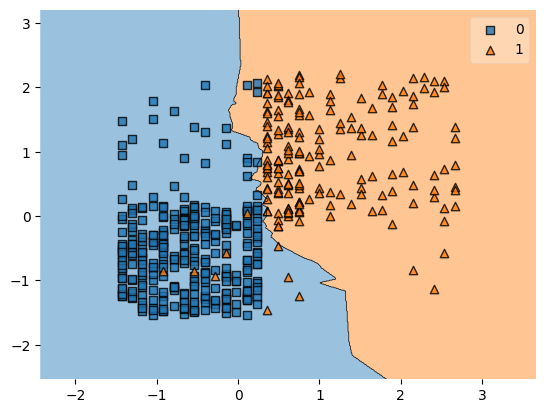

In [18]:
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=knn)
plt.show()